<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Validación y modelación</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
5. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

##   <span style="color:blue">Introducción</span>
 

Después de desarrollar un modelo: ¿Qué sigue? ¿Cómo estamos seguros de que es funcional? Si hacemos varios modelos. ¿Cómo decidimos cuál elegir? Y si el modelo no está funcionando bien, ¿Cómo revisamos sus problemas? Aquí entran las diferentes métricas y métodos que conforman los conceptos conocidos como "Validación" y "Evaluación"

¿Qué son exactamente?:

- Vamos a pensar en "Validación" en los métodos que nos permitan revisar y mejorar la capacidad de generalización de un modelo

- "Evaluación" se referirá a la(s) métrica(s) que ayudan a observar el desempeño final del modelo

en ciertos casos puede parecer que estamos hablando de lo mismo, pero la diferencia principal radica en cómo aplicamos estos. Cuando "Validamos" un modelo, aplicamos algún tipo de tecnica sobre los datos, y hasta los transformamos. Mientras que, al "evaluar" un modelo, sacamos un valor/valores de este.

Ya hemos visto/usado ejemplos de estos dos. ¿Cuáles?

##   <span style="color:blue">Evaluación</span>

<figure> 
<center>
<img src="https://imgs.xkcd.com/comics/machine_learning.png"/>
</center>
</figure>

Tenemos diferentes metricas de evaluación para casos de clasificación y regresión

###   <span style="color:blue">Error cuadrático medio</span>
 

Como se ha visto anteriormente, utilizamos los errores en los modelos de regresión para observar qué tan diferentes son los resultados obtenidos por el modelos con respecto a los resultados reales. La función más utilizada para esta es el error cuadrático medio

$$
\text{MSE} = \frac{1}{N}\sum_{i=1}^{N}(x_i-\hat{x_i})^2
$$

###   <span style="color:blue">Error cuadrático absoluto</span>

Otro posible error que podemos utilizar. Esta utiliza el valor absoluto en lugar de la potencia al cuadrado. Esto causa que los errores más grandes(posiblemente provenientes de datos atípicos) no sean tan castigados como en el MSE. Así que es preferible utilizar el MAE en casos donde no haya muchos atípicos o no es de interés los efectos que tengan estos sobre el modelo y los datos.

$$
\text{MAE}=\frac{1}{N}\sum_{i=1}^{N}|x_i-\hat{x_i}|
$$

###   <span style="color:blue">Matriz de confusión</span>

Usualmente utilizada en clasificación binaria, esta matriz nos permite observar las capacidades de clasificación de un modelo con más detalle.

<figure> 
<center>
<img src="https://www.juanbarrios.com/wp-content/uploads/2019/07/MATRIZ-CONFUSION.png"/>
</center>
</figure>

Aquí pensamos en los diferentes casos que puede tomar la clasificación binaria.

- El modelo predice "positivo", cuando el valor real es positivo (Caso preferido 1 o Verdadero Positivo)
- El modelo predice "positivo", cuando el valor real es negativo (Error tipo 1 o "Falso Positivo" )
- El modelo predice "negativo", cuando el valor real es positivo (Error tipo 2 o "Falso Negativo")
- El modelo predice "negativo", cuando el valor real es negativo (Caso preferido 2 o Verdadero negativo)

con base en esto podemos obtener diferentes métricas:


####  <span style="color:blue">Accuracy/Exactitud</span>

Esta es la métrica "clásica" o predeterminada en la mayoría de librerías de ML. Aquí se obtiene la proporción de predicciones correctas(o sea los casos verdaderos) sobre las predicciones totales

$$
\text{accuracy} = \frac{VP+VN}{\text{total}}
$$

####  <span style="color:blue">Precisión</span>

Una medida alternativa a la exactitud. Esta se prefiere cuando tenemos datos altamente desbalanceados. Aquí solo tomamos en cuenta los casos positivos y obtenemos una proporción de los verdaderos positivos sobre todos los casos en los que se predijo positivo.

$$
\text{precision} = \frac{VP}{VP+FP}
$$

####  <span style="color:blue">Recall/Sensibilidad</span>

Una métrica incluso más robusta con los datos desbalanceados. Aquí vemos la proporción de los casos en los que se predice positivo sobre todos los casos en los que si es positivo

$$
\text{recall} = \frac{VP}{VP+FN}
$$


####  <span style="color:blue">Valor F1</span>

el problema con la precisión y el recall es que solo toma en cuenta la mitad de la información de la matriz de confusión, así que podríamos estarnos perdiendo de algo.

<figure> 
<center>
<img src="https://www.kdnuggets.com/wp-content/uploads/nagesh-metrics-3.png"/>
</center>
</figure>

El valor F1 no es más que la media armónica de estas dos métricas. Permitiéndonos resumir la información de la mayoría de la matríz.

Como usamos la media armónica, tenemos una métrica bastante robusta contra datos atípicos.

$$
F1 =2 \times \frac{\text{precision} \times \text{recall}}{\text{precision}+\text{recall}}
$$

Podemos obtener varias de estas métricas de forma sencilla con scikit

In [24]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("matriz de confusión clásica: \n ", confusion_matrix(y_test, y_pred))
print("matriz de confusión múltiple: \n ", multilabel_confusion_matrix(y_test, y_pred))

print("métricas: \n", classification_report(y_test, y_pred))

matriz de confusión clásica: 
  [[3 0 0]
 [0 2 0]
 [0 2 9]]
matriz de confusión múltiple: 
  [[[13  0]
  [ 0  3]]

 [[12  2]
  [ 0  2]]

 [[ 5  0]
  [ 2  9]]]
métricas: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      1.00      0.67         2
           2       1.00      0.82      0.90        11

    accuracy                           0.88        16
   macro avg       0.83      0.94      0.86        16
weighted avg       0.94      0.88      0.89        16



####  <span style="color:blue">Especificidad</span>

Si nos damos cuenta, en ningún caso anterior trabajamos con los verdaderos negativos. Eso es porque, en el contexto de hipótesis, el caso nulo no es de "mucho interés". sin embargo, existe la métrica de la especificidad, la cual es la proporción de los verdadernos negativos sobre todos los casos negativos.

$$
\text{specificity} = \frac{VN}{VN+FP}
$$

Nótese que el recall y la especificidad explican toda la matriz de confusión

###   <span style="color:blue">Curva ROC</span>
 

La curva ROC(Receiver Operating Characteristics) es otra métrica (o mejor dicho un gráfico) para evaluar modelos de clasificación binarios, aunque con un poco de creatividad se puede extender a clasificación múltiple

Esta grafica se hace a partir de metricas obtenidas con la matriz de confusión. Aquí hacemos una comparación entre el recall, que también es llamada la rata de verdaderos positivos, y la especificidad, también llamada la rata de verdaderos negativos.

<figure> 
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1200px-Roc_curve.svg.png" height= 500, width=500/>
</center>
</figure>


gráficamente puede ser dificil de entender, razón por la cual calculamos el "area bajo la curva" (Area Under Curve - AUC). Esta métrica Va de 0 a 1. Un modelo que tiene 100% de predicciones acertadas tiene un valor de AUC de 1. 

<figure> 
<center>
<img src="https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png" height= 500, width=500/>
</center>
</figure>

AUC - class 0: 100.00%
AUC - class 1: 72.22%
AUC - class 2: 99.06%


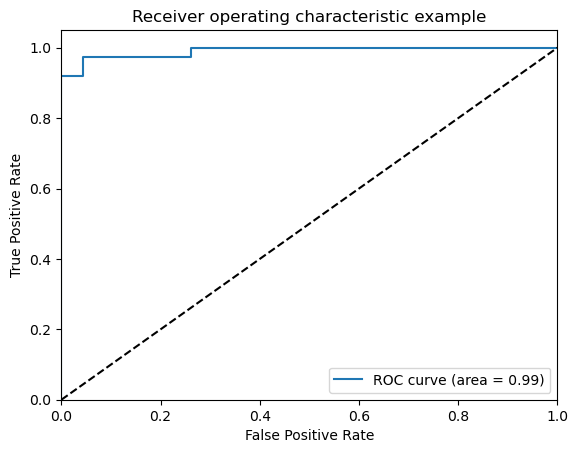

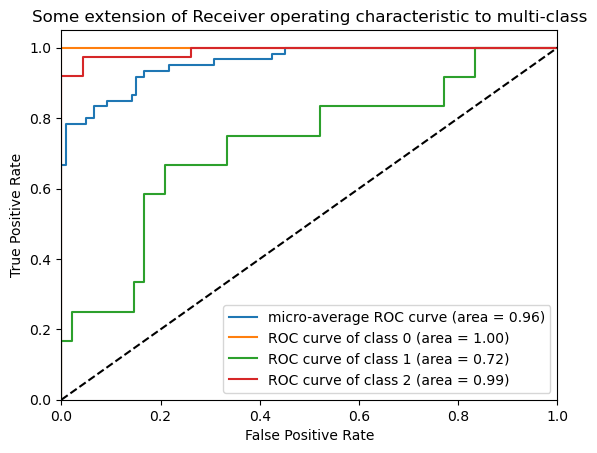

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

import matplotlib.pyplot as plt

y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.75,
                                                    random_state=0)

binary_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=13))

y_score = binary_classifier.fit(X_train, y_train).decision_function(X_test)



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

##   <span style="color:blue">Validación</span>



<figure> 
<center>
<img src="https://imgs.xkcd.com/comics/ai_methodology.png"/>
</center>
</figure>

###   <span style="color:blue">Separación de datos</span>
 

el clásico caso del "train test split". Separamos los datos en dos "subconjuntos": Uno para hacer el ajuste del modelo, y otro en el que se harán comparaciónes a nivel de predicciones del modelo ya entrenado.


<figure> 
<center>
<img src="https://www.mltut.com/wp-content/uploads/2020/05/k-fold-cross-validation.png"/>
</center>
</figure>

La idea de esto es poder trabajar el modelo en un "ambiente desconocido pero controlado". Logramos observar el modelo con datos que no había visto antes, pero no son completamente desconocidos para el científico.

Esta es la forma más sencilla de validación. Ahora, tiene debilidades.

La más grande de esta es el sesgo de muestra. Si casualmente nuestro subconjunto de prueba no tiene datos lo suficientemente variados, corremos el riesgo de que las métricas que usemos para evaluar el modelo tenga una "precisión no merecida". 

Podemos intentar arreglar esto separando un poco más el dataset. Dejando tres subconjuntos: Uno de entrenamiento, uno de validación y uno de prueba

<figure> 
<center>
<img src="https://miro.medium.com/max/1400/1*wkaZ-efb_e2ff_lXSWOBfw.png"/>
</center>
</figure>

Esto puede ciertamente mitigar el sesgo de muestra, pero no es la mejor alternativa

<AxesSubplot:xlabel='0'>

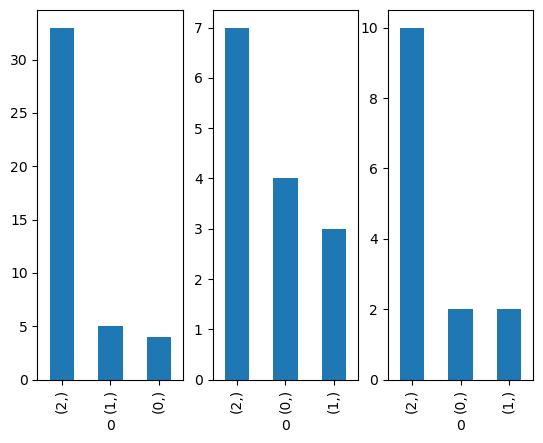

In [1]:
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance

import numpy as np
import pandas as pd


iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 10, 1: 10, 2: 50},
    random_state=16,
)

X, X_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,train_size =0.75)

fig, axes = plt.subplots(1,3)

pd.DataFrame(y_train).value_counts().plot(kind='bar', ax=axes[0])
pd.DataFrame(y_val).value_counts().plot(kind='bar', ax=axes[1])
pd.DataFrame(y_test).value_counts().plot(kind='bar', ax=axes[2])

###   <span style="color:blue">Leave One Out</span>

De ahora en adelante no hacemos una sola separación de datos, sino múltiples.

En este caso, tomando en cuenta su nombre, el subconjunto de prueba solo consta de un elemento. Cada observación eventualmente es utilizada como elemento de prueba. Esto significa que se hacen $N$ separaciones de datos y $N$ ajustes de modelo. Evaluamos cada uno de estos modelos y luego podemos, por ejemplo, obtener el promedio de precisión de estos para saber qué tan bien está generalizando el modelo.


<figure> 
<center>
<img src="https://www.researchgate.net/profile/Nikolaos-Chlis/publication/266617511/figure/fig11/AS:295705362092036@1447513060277/Leave-One-Out-Cross-Validation.png"/>
</center>
</figure>




In [2]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=3)

X, y = load_iris(return_X_y=True)

y_true, y_pred = list(), list()
for train_ix, test_ix in loo.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # fit model
    knn.fit(X_train, y_train)
    # evaluate model
    yhat = knn.predict(X_test)
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.960


Este método asegura la menor cantidad de sesgo posible, ya que revisamos la consistencia del modelo sobre TODOS Y CADA UNO DE LOS DATOS, pero tiene dos problemas:

- Sufre con datos con una alta varianza.
- Es computacionalmente costoso, así que con datos de gran tamaño no es recomendable.

###   <span style="color:blue">K Folds</span>
 

La versión generalizada de Leave One out. Separamos el dataset de en en múltiples subconjuntos de "casi" tamaños iguales vamos iterando sobre estos. En la iteración 1, la muestra 1 será el dataset de prueba, mientras que el resto de muestras se usarán como datos de entrenamiento. Este proceso se repetirá $K$ veces, donde $K$ es el número de muestras.

K folds es igual a Leave One Out cuando $K=N$

<figure> 
<center>
<img src="https://www.mltut.com/wp-content/uploads/2020/05/cross-validation.png"/>
</center>
</figure>

In [9]:
from sklearn.model_selection import KFold 
from sklearn.svm import SVC
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1)
poly = SVC(kernel='poly', degree=3, C=1)
 
acc_score_rbf = []
acc_score_poly = []

X, y = load_iris(return_X_y=True)

for train_ix , test_ix in kf.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
     
    rbf.fit(X_train,y_train)
    poly.fit(X_train, y_train)
    
    pred_rbf = rbf.predict(X_test)
    pred_poly = poly.predict(X_test)
     
    acc_rbf = accuracy_score(pred_rbf, y_test)
    acc_score_rbf.append(acc_rbf)
    
    acc_poly = accuracy_score(pred_poly, y_test)
    acc_score_poly.append(acc_poly)
     
avg_acc_score_rbf = sum(acc_score_rbf)/k
avg_acc_score_poly = sum(acc_score_poly)/k
 
print('accuracy of each fold in rbf - {}'.format(acc_score_rbf))
print('Avg rbf accuracy : {}'.format(avg_acc_score_rbf))

print('accuracy of each fold in poly - {}'.format(acc_score_poly))
print('Avg poly accuracy : {}'.format(avg_acc_score_poly))

accuracy of each fold in rbf - [1.0, 1.0, 0.9, 0.9, 0.9333333333333333]
Avg rbf accuracy : 0.9466666666666667
accuracy of each fold in poly - [1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]
Avg poly accuracy : 0.9733333333333334


K folds sacrifica algo de sesgo a favor de resistir a los datasets con alta varianza

####   <span style="color:blue">K folds estratificados</span>
 

Una variación de K folds en la cual se usa muestreo estratificado en lugar de muestreo aleatorio. Se generan las mismas muestras pero buscando representar adecuadamente las proporciones de cada clase

<figure> 
<center>
<img src="https://uedufy.com/wp-content/uploads/2021/12/stratified-sampling-2.png"/>
</center>
</figure>

In [11]:
from sklearn.model_selection import StratifiedKFold 

X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 15, 1: 15, 2: 50},
    random_state=16,
)

k = 5
kf = StratifiedKFold(n_splits=k, random_state=None,shuffle=False)
poly = SVC(kernel='poly', degree=3, C=1)
 
acc_score_poly = []

for train_ix , test_ix in kf.split(X,y):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
     
    poly.fit(X_train, y_train)
    
    pred_poly = poly.predict(X_test)
     
    acc_score_rbf.append(acc_rbf)
    
    acc_score_poly.append(acc_poly)
     
avg_acc_score_poly = sum(acc_score_poly)/k

print('accuracy of each fold in poly - {}'.format(acc_score_poly))
print('Avg poly accuracy : {}'.format(avg_acc_score_poly))

accuracy of each fold in poly - [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Avg poly accuracy : 0.9666666666666666


##   <span style="color:blue">Recomendaciones</span>

Aquí vimos implementaciones "manuales" de como funcionan las metodologías de estos casos de validación cruzada, pero esto en realidad podemos sacarlo en unas cuantas lineas de código

In [13]:
from sklearn.model_selection import cross_val_score


print(cross_val_score(poly, X, y, cv=kf).mean())

0.9875


Además, podemos mezclar los metodos de validación cruzada con la separación de datos tradicional

<figure> 
<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"/>
</center>
</figure>